In [1]:
import os
import numpy as np
import pickle
import scipy
import sklearn
import sys
sys.path.append('./utils')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from characterDefinitions import getHandwritingCharacterDefinitions
from preprocessing import trial_average
from affinewarp import PiecewiseWarping

In [2]:
rootDir = os.path.expanduser('~') + '/handwriting-model/data/handwritingBCIData/'
dataDirs = ['t5.2019.05.08','t5.2019.11.25','t5.2019.12.09','t5.2019.12.11','t5.2019.12.18',
            't5.2019.12.20','t5.2020.01.06','t5.2020.01.08','t5.2020.01.13','t5.2020.01.15']
charDef = getHandwritingCharacterDefinitions()

In [82]:
print('===========================================================')
sentenceData = np.empty((1, 192))
startData = np.empty((1,1))
charData = np.empty((1,31))

for dataDir in dataDirs:
    print('Loading dataset: ' + dataDir)
    sentenceDat = scipy.io.loadmat(rootDir+'Datasets/'+dataDir+'/sentences.mat')
    labelDat = scipy.io.loadmat(rootDir+'RNNTrainingSteps/Step2_HMMLabels/HeldOutTrials/'+dataDir+'_timeSeriesLabels.mat')
    newSentenceDat = np.array(sentenceDat['neuralActivityCube']).reshape((-1, 192))
    newStartDat = np.array(labelDat['charStartTarget']).reshape((-1, 1))
    newCharProbDat = np.array(labelDat['charProbTarget']).reshape((-1, 31))
    sentenceData = np.concatenate((sentenceData, newSentenceDat), axis=0)
    startData = np.concatenate((startData, newStartDat), axis=0)
    charData = np.concatenate((charData, newCharProbDat), axis=0)
    # print(sentenceDat.keys())
    # print(labelDat.keys())
    print(f"Sentence data dimensions: {sentenceDat['neuralActivityCube'].shape}")
    print(f"Character start dimensions: {labelDat['charStartTarget'].shape}")
    print(f"Character probability dimensions: {labelDat['charProbTarget'].shape}")
    print(f"Sentence data shape: {sentenceData.shape}")
    print(f"Character start data shape: {startData.shape}")
    print(f"Character probability data shape: {charData.shape}")
    print('===========================================================')

sentenceData = sentenceData[1:,:]
startData = startData[1:,:]
charData = charData[1:,:]
print(f'Smoothing spiking data...')
sentenceData = scipy.ndimage.gaussian_filter1d(
        sentenceData, 3.0, axis=0)
print('Done!')

Loading dataset: t5.2019.05.08
Sentence data dimensions: (102, 10669, 192)
Character start dimensions: (102, 10669)
Character probability dimensions: (102, 10669, 31)
Sentence data shape: (1088239, 192)
Character start data shape: (1088239, 1)
Character probability data shape: (1088239, 31)
Loading dataset: t5.2019.11.25
Sentence data dimensions: (84, 13877, 192)
Character start dimensions: (84, 13877)
Character probability dimensions: (84, 13877, 31)
Sentence data shape: (2253907, 192)
Character start data shape: (2253907, 1)
Character probability data shape: (2253907, 31)
Loading dataset: t5.2019.12.09
Sentence data dimensions: (84, 11045, 192)
Character start dimensions: (84, 11045)
Character probability dimensions: (84, 11045, 31)
Sentence data shape: (3181687, 192)
Character start data shape: (3181687, 1)
Character probability data shape: (3181687, 31)
Loading dataset: t5.2019.12.11
Sentence data dimensions: (84, 8234, 192)
Character start dimensions: (84, 8234)
Character probabil

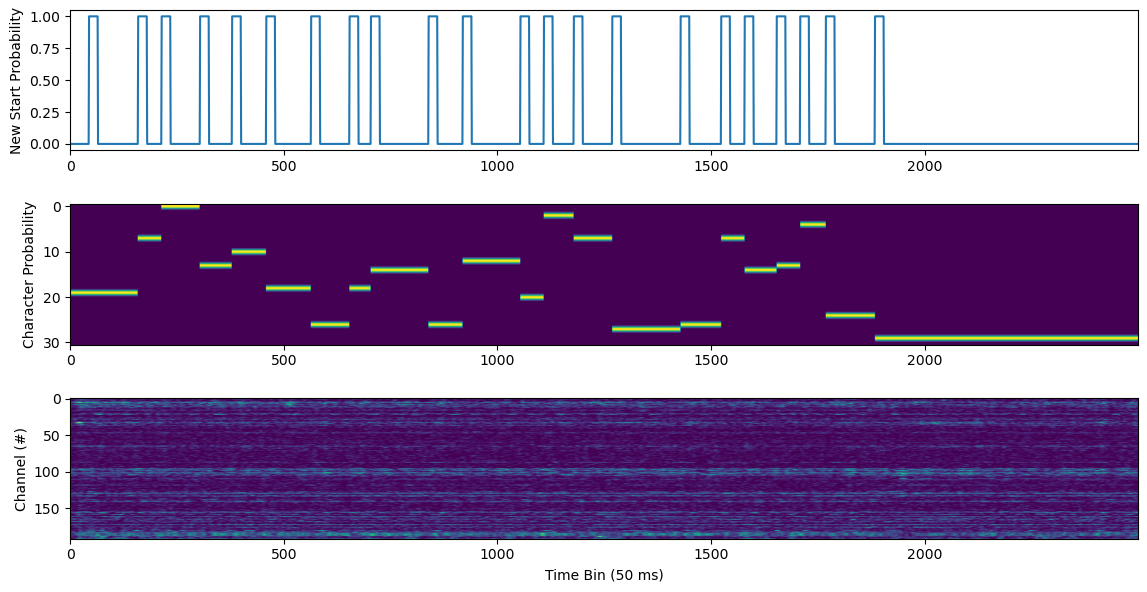

In [144]:
plotRange = np.arange(0,2500)
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.tight_layout(pad = 1)
fig.set_size_inches(12, 6)
ax1.plot(startData[plotRange,:])
ax1.set_xlim([plotRange[0], plotRange[-1]])
ax1.set_ylabel('New Start Probability')
ax2.imshow(charData[plotRange, :].T, aspect='auto')
ax2.set_xlim([plotRange[0], plotRange[-1]])
ax2.set_ylabel('Character Probability')
ax3.imshow(sentenceData[plotRange,:].T, aspect='auto')
ax3.set_xlim([plotRange[0], plotRange[-1]])
ax3.set_xlabel('Time Bin (50 ms)')
ax3.set_ylabel('Channel (#)')
plt.show()

In [134]:
data = np.concatenate((sentenceData, charData, startData), axis=1)
print(data.shape)

(8678889, 224)


In [132]:
print(data[:,192:223].shape)


(8678889, 31)


In [135]:
data = dict()

In [136]:
data['inputs'] = sentenceData
data['charLabels'] = charData
data['charStarts'] = startData

In [138]:
print(data.keys())

dict_keys(['inputs', 'charLabels', 'charStarts'])


In [140]:
with open("handwriting.dat", "wb") as f:
    pickle.dump(data, f)